In [7]:
import pandas as pd
def extract_reward(log_path):
  # Open the log file and read its contents
  with open("trained_model/RNN_learner_single/" + log_path + "/run.log", "r") as file:
    log_lines = file.readlines()  
  # Initialize empty lists to store the enc loss and dec loss values
  test_loss_values = []
  test_correct_values = []
  # Iterate over each line in the log file
  for line in log_lines:
    # Split the line into individual components
    components = line.split()
    # print(components)
    # Check if the line contains enc loss and dec loss information
    if "test" in components:

        # Find the indices of enc loss and dec loss in the line
        test_loss_index = components.index("test")
        correct_index = components.index("%correct")
        
        # Extract the enc loss and dec loss values
        test_loss = float(components[test_loss_index + 3].split(',')[0])

        test_correct = float(components[correct_index + 2])
        
        # Append the values to the corresponding lists
        test_loss_values.append(test_loss)
        test_correct_values.append(test_correct)
  data = pd.DataFrame({"test_loss": test_loss_values, "test_correct": test_correct_values})
  return(data)
    
adv_gpt = extract_reward('cells_5deepseek-chat')


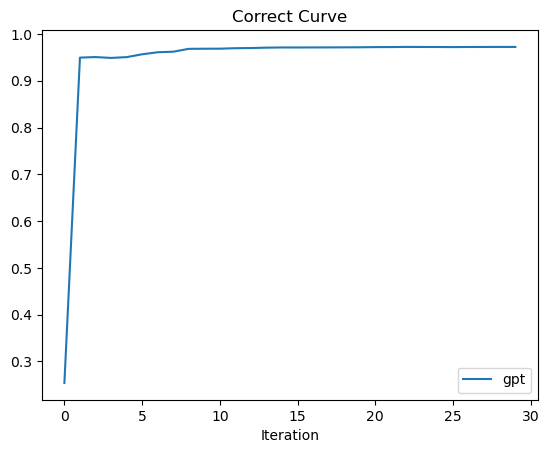

In [8]:
# import pandas as pd
import matplotlib.pyplot as plt
plt.plot(range(0, adv_gpt.shape[0]), adv_gpt["test_correct"], label = "gpt") 

# Add labels and title to the plot
plt.xlabel("Iteration")
plt.ylabel("")
plt.title("Correct Curve")

# Add legend
plt.legend()

# Display the plot
plt.show()


In [26]:
adv_gpt["test_correct"].idxmax()

77

In [16]:
import pandas as pd
def extract_reward(log_path):
  # Open the log file and read its contents
  with open("trained_model/adv_RL_400000_eps_0.01_lr_0.001/" + log_path + "/run.log", "r") as file:
    log_lines = file.readlines()  
  # Initialize empty lists to store the enc loss and dec loss values
  reward_values = []
  # Iterate over each line in the log file
  for line in log_lines:
    # Split the line into individual components
    components = line.split()
    # print(components)
    # Check if the line contains enc loss and dec loss information
    if "reward:" in components:
      # Find the indices of enc loss and dec loss in the line
      reward_index = components.index("reward:")
      # Extract the enc loss and dec loss values
      reward = float(components[reward_index + 1].split(',')[0])
      # Append the values to the corresponding lists
      reward_values.append(reward)
  # Create a DataFrame from the extracted values
  data = pd.DataFrame({"reward_values": reward_values})
  return(data)
    
adv_gpt = extract_reward('deepseek-chat')


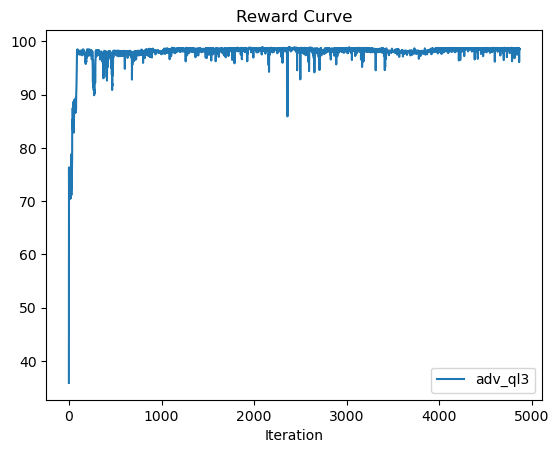

In [17]:
# import pandas as pd
import matplotlib.pyplot as plt

# Read the log file and extract the "enc_loss" and "dec_loss" values into a DataFrame
# data = pd.read_csv("/tf/nongit/local/CBT/optrun.log", sep=" ", header=None, usecols=[8, 12], names=["enc_loss", "dec_loss"])

# Plot the loss curve
plt.plot(range(0, adv_gpt.shape[0]), adv_gpt["reward_values"], label = "adv_ql3") 

# Add labels and title to the plot
plt.xlabel("Iteration")
plt.ylabel("")
plt.title("Reward Curve")

# Add legend
plt.legend()

# Display the plot
plt.show()


In [35]:
adv_gpt["reward_values"].idxmax()

102